In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp
import mosek
import matplotlib.pyplot as plt
import scipy.stats
import phi_divergence as phi
from time import process_time


In [7]:
def toymodel(Z_arr):
    x = cp.Variable(2, nonneg = True)
    constraints = [Z_arr @ x <= 1, x[0] <= x[1]-1, x<=10]
    obj = cp.Maximize(cp.sum(x))
    prob = cp.Problem(obj,constraints)
    prob.solve(solver=cp.MOSEK)
    return(x.value, prob.value)

def toymodel_true(beta):
    x = cp.Variable(2, nonneg = True)
    constraints = [x[0] <= x[1]-1, x<=10, (1-2*beta)*x[1] + 1 >= 0]
    obj = cp.Maximize(cp.sum(x))
    prob = cp.Problem(obj,constraints)
    prob.solve(solver=cp.MOSEK)
    return(x.value, prob.value)

def lowbound(p,r, par, phi_div):
    q = cp.Variable(2, nonneg = True)
    constraints = [cp.sum(q) == 1]
    constraints = phi_div(p,q,r,par,constraints)
    obj = cp.Minimize(q[0])
    prob = cp.Problem(obj,constraints)
    prob.solve(solver=cp.MOSEK)
    return(prob.value)

In [8]:
par = 1
phi_div = phi.mod_chi2_cut
n = 1000
phi_dot = 1
alpha = 0.5
r = phi_dot/(2*n)*scipy.stats.chi2.ppf(1-alpha, 1)

In [10]:
np.random.seed(1)
data = np.random.uniform(-1,1,size = (n,2))
Z_arr = np.array([data[0]])
beta = 0.95
delta = 1/n

In [11]:
lb = -np.inf                      
while beta > lb:
    [x, obj] = toymodel(Z_arr)
    constr = data.dot(x)
    p = np.array([len(constr[constr<=1])/n,len(constr[constr>1])/n])
    lb = lowbound(p,r, par, phi_div)
    gap = np.ceil(n*(beta-lb)).astype(int)
    if gap > 0:
        vio_sort = np.sort(constr[constr>1])    #the violations are ranked here
        vio_value = vio_sort[gap-1]
        ind = np.where(constr == vio_value)[0][0]   # the n*(beta-lb)-th scenario is added
        Z_arr = np.append(Z_arr, np.array([data[ind]]),axis = 0)
print('true prob', 1/2+1/(2*x[1]))
print(obj)
print(lb)
print(len(Z_arr))

true prob 0.958669367420551
1.1802197204137297
0.9518734130797427
3


In [12]:
np.random.seed(1)
data = np.random.uniform(-1,1,size = (n,2))
Z_arr = np.array([data[0]])
beta = 0.95
delta = 1/n

In [14]:
lb = -np.inf
while beta > lb:
    [x, obj] = toymodel(Z_arr)
    constr = data.dot(x)
    p = np.array([len(constr[constr<=1])/n,len(constr[constr>1])/n])
    lb = lowbound(p,r, par, phi_div)
    if len(constr[constr>1])!= 0:
        vio_min = np.min(constr[constr>1])        # the least violated scenario is added
        ind = np.where(constr == vio_min)[0][0]
        Z_arr = np.append(Z_arr, np.array([data[ind]]),axis = 0)
print(obj)
print(lb)
print('true prob', 1/2+1/(2*x[1]))
print(len(Z_arr))

1.182044204901336
0.950840515499127
true prob 0.9582858577080189
197


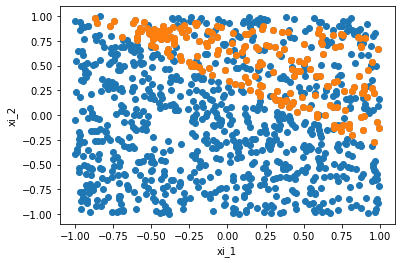

In [15]:
plt.plot(data[:,0],data[:,1],'o')
plt.plot(Z_arr[:,0],Z_arr[:,1],'o')
plt.xlabel('xi_1')
plt.ylabel('xi_2')
plt.savefig('N1000alpha05beta095', format = 'eps')

In [17]:
[x_true, obj_true] = toymodel_true(beta)
constr = data.dot(x_true)
p = np.array([len(constr[constr<=1])/n,len(constr[constr>1])/n])
lb = lowbound(p,r, par, phi_div)
print(p)
print(lb)
print(obj_true)

[0.942 0.058]
0.9384746687639517
1.2222222222222223


In [18]:
constr

array([ 4.71170431e-01, -5.50346644e-01, -9.84412925e-01, -4.12918337e-01,
        6.33188476e-02,  3.93642115e-01,  7.74583692e-01,  2.73791710e-01,
        1.12045130e-01, -7.50799593e-01,  1.10741341e+00,  3.85922297e-01,
        9.60545731e-01, -1.11653510e+00,  7.66945656e-01, -2.64572648e-01,
        1.75453862e-01, -3.67325906e-01,  7.85057255e-01,  4.48829206e-01,
        6.60115029e-01,  5.94052728e-01, -2.03964163e-01, -3.67836225e-01,
       -8.69319764e-01,  2.90604953e-01, -5.85090065e-01, -9.94400309e-01,
       -7.68577032e-01,  4.63753142e-01, -2.79356821e-01, -1.47512699e-01,
       -2.02405515e-02,  6.94857257e-02,  2.91143369e-01, -7.15966898e-01,
        6.02930941e-01, -7.66395820e-01, -2.43296183e-01,  5.57953768e-01,
        3.60006258e-01, -2.80016477e-01,  8.28620016e-01,  1.01699815e+00,
        3.06755267e-01,  9.13253013e-01,  1.63068506e-01, -6.04798532e-01,
        2.53372086e-01,  1.49848770e-01,  2.16057610e-02, -2.31413400e-01,
        3.64919180e-01,  